<a href="https://colab.research.google.com/github/ValarieMello/CSCI580_VTM/blob/main/A5_Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#load in the file
from google.colab import files
uploaded = files.upload()
#bring in needed libraries
import numpy as np
import matplotlib.pyplot as plt

#load in and split the data
data = np.loadtxt("data.csv", delimiter=",")
# X = all input features (all columns except the last one)
# y = labels (last column, converted to integers)
x = data[:, :-1]
y = data[:, -1].astype(int)

print("Data loaded:", data.shape)

Saving data.csv to data (8).csv
Data loaded: (100, 3)


Valarie Mello

Artifical Intelligence

Assignment 5: Perception

**Part 1: Heurstic Approach**

Tasks:
*  Plot data from data.csv
*  Implement perceptron using the heuristic
approach
*  Plot the initial separation line as red,
subsequent ones after each iteration in
dashed green, and the last one in black
*  Play with the learning rate
* Analyze the results in the report

**Psudocode**
1. Start a perceptron with random weights and
bias: w 1
, w 2
, ..., w n
, b
2. For each of all points (data) with their
corresponding labels (answers):
2.1. Classify according to the perceptron
2.2. For a misclassified point (x 1
,x 2
, ..., x n
) :
2.2.1. If classification==0:
2.2.1.1. b + r → b
2.2.1.2. For all w i
: wi + rx i → wi
2.2.2. If classification==1:
2.2.2.1. b - r → b
2.2.2.2. For all w i
: wi - rx i → wi
3. Repeat #2 enough number of times
Earlier heuristic approach with binary classification

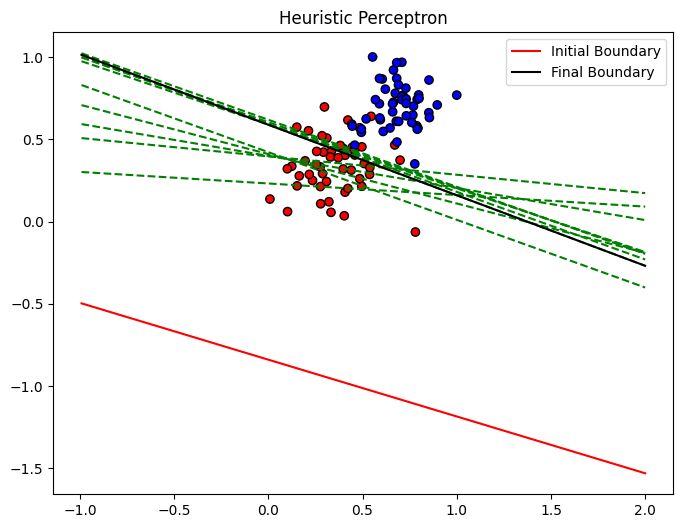

In [42]:
#graph helper function
def plot_line(weight, bias, style="-", color="black", label=None):
    # Create 2 x-range values for plotting the line
    x_vals = np.array([min(x[:,0]) - 1, max(x[:,0]) + 1])
    y_vals = -(weight[0] * x_vals + bias) / weight[1]
    plt.plot(x_vals, y_vals, linestyle=style, color=color, label=label)

#function for the huristic method
def heuristic_perceptron(x, y, lr=0.1, iterations=10):
    n_features = x.shape[1]

    #Start a perceptron with random weights and bias
    weight = np.random.randn(n_features)
    bias = np.random.randn()

    #Plot initial boundary using red
    plot_line(weight, bias, "-", "red", label="Initial Boundary")

    #For each of all points (data) with their corresponding labels (answers):
    for j in range(iterations):
        for i in range(len(x)):
            x_i = x[i]
            label = y[i]

            #Classify according to perceptron
            pred = 1 if (np.dot(weight, x_i) + bias) >= 0 else 0

            #If misclassified:
            if pred != label:
                #If classificaton == 0
                if pred == 0:
                    #b + r → b
                    bias = bias + lr
                    #wi + r*xi → wi  (for all weights)
                    weight = weight + lr * x_i
                #If classification == 1
                else:
                    #b - r → b
                    bias = bias - lr
                    #wi - r*xi → wi
                    weight = weight - lr * x_i

        #Plot boundary after each full pass over the data in green
        plot_line(weight, bias, "--", "green")

    #graph the final boundary in black
    plot_line(weight, bias, "-", "black", label="Final Boundary")

    return weight, bias

#plot out the whole figure to be shown in report
plt.figure(figsize=(8,6))

# Plot training data
plt.scatter(x[:,0], x[:,1], c=y, cmap="bwr", edgecolors="k")

#call the perceptron and draw all boundaries
weight_final, bias_final = heuristic_perceptron(x, y, lr=0.1, iterations=10)

#graph with a legend
plt.title("Heuristic Perceptron")
plt.legend()
plt.show()